## Dataset Preparation

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from keras.preprocessing import image

In [2]:
p=Path(r"C:\Users\PRADEEP\Music\train")

In [3]:
type(p)

pathlib.WindowsPath

### Loading the lung cancer dataset

In [4]:
labels_dict={"normal":0,"cancer":1}
labels=[]
image_data=[]
for folder_name in p.glob("*"):
    
    label=str(folder_name).split("\\")[-1][:-1]
    
    for image_path in folder_name.glob("*.png"):
    
        img=image.load_img(image_path,target_size=(32,32))
        
        img_array=image.img_to_array(img)
        
        image_data.append(img_array)
        
        labels.append(labels_dict[label])

In [5]:
print(len(labels))
print(len(image_data))


251
251


In [6]:
print(type(image_data),type(labels))

<class 'list'> <class 'list'>


##### Conversion of image  into numpy array

In [7]:
image_data=np.array(image_data,dtype="float32")/255.0
labels=np.array(labels)

In [8]:
print(image_data.shape,labels.shape)

(251, 32, 32, 3) (251,)


#### Random shuffling of a images and labels

In [9]:
import random
combine=list(zip(image_data,labels))
random.shuffle(combine)
image_data[:],labels[:]=zip(*combine)

#### Visualisation of datasets

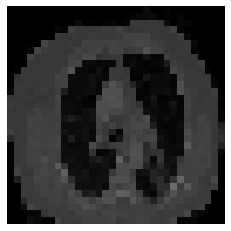

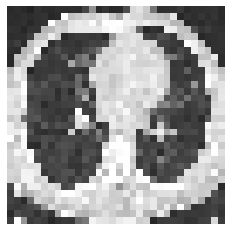

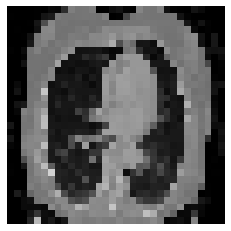

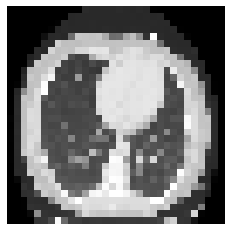

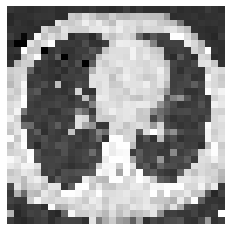

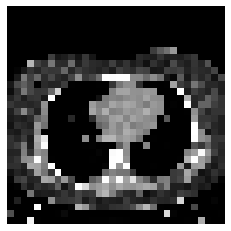

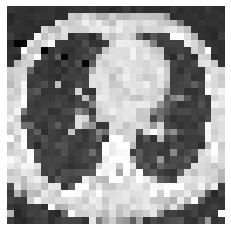

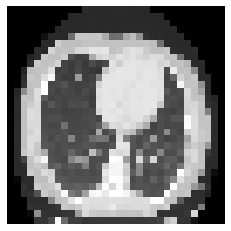

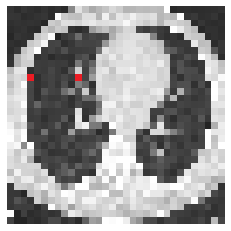

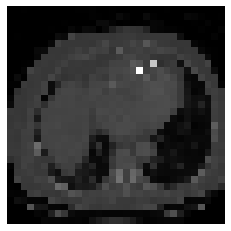

In [10]:
def drawimage(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return

for i in range(10):
    drawimage(image_data[i])

## SVM Classifier

In [11]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=500):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        
        W = np.zeros((1,no_of_features))
        bias = 0
        
        
        losses = []
        
        for i in range(maxItr):
            
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            
            for batch_start in range(0,no_of_samples,batch_size):
                
                gradw = 0
                gradb = 0
                
                
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

### Reshaping the dataset

In [12]:
# each sample of image in image data have 16875 feature
m = image_data.shape[0]
image_data= image_data.reshape(m,-1)
print(image_data.shape)
print(labels.shape)


(251, 3072)
(251,)


In [13]:
total_class = len(np.unique(labels))
print(total_class)

2


#### Prepare class wise data

In [14]:
def classwisedata(x,y):
    data= {}
    for i in range(total_class):
        data[i]=[]
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        print(data)
    for k in data.keys():
        data[k]=np.array(data[k])
        print(data)
    return data
    print(data)

In [15]:
data= classwisedata(image_data,labels)

{0: [], 1: [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]}
{0: [array([0.16470589, 0.16470589, 0.16470589, ..., 0.23529412, 0.23529412,
       0.23529412], dtype=float32)], 1: [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]}
{0: [array([0.16470589, 0.16470589, 0.16470589, ..., 0.23529412, 0.23529412,
       0.23529412], dtype=float32)], 1: [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]}
{0: [array([0.16470589, 0.16470589, 0.16470589, ..., 0.23529412, 0.23529412,
       0.23529412], dtype=float32), array([0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
       0.        ], dtype=float32)], 1: [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]}
{0: [array([0.16470589, 0.16470589, 0.16470589, ..., 0.23529412, 0.23529412,
       0.23529412], dtype=float32), array([0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
       0.        ],

In [16]:
data.keys()

dict_keys([0, 1])

### Type of dataset

In [17]:
print(type(data[0]))
print(type(data[1]))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


###  Shape of images in each class

In [18]:
print(data[0].shape)
print(data[1].shape)


(136, 3072)
(115, 3072)


In [19]:
def getDataPairForSVM(d1,d2):
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,1))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels

## Training NC2 SVM's Part!

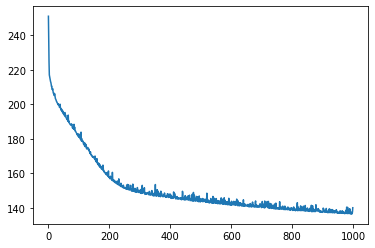

In [20]:
mySVM  = SVM()
xp, yp  = getDataPairForSVM(data[0],data[1])
w,b,loss  = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
#print(loss)
plt.plot(loss)


In [21]:
def trainSVMs(x,y):
    
    svm_classifiers = {}
    for i in range(total_class):
        svm_classifiers[i] = {}
        for j in range(i+1,total_class):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
    
    return svm_classifiers

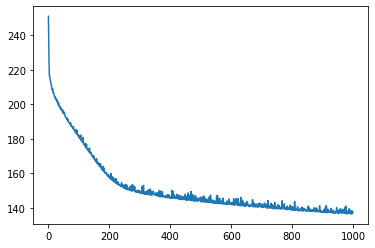

In [22]:
svm_classifier = trainSVMs(image_data,labels)

In [23]:
def binaryPredict(x,w,b):
    z  = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1

In [24]:
def predict(x):
    
    count = np.zeros((total_class,))
    
    for i in range(total_class):
        for j in range(i+1,total_class):
            w,b = svm_classifier[i][j]
            
            #Take a majority prediction 
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction

In [25]:
def accuracy(x,y):
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

### Accuracy of the model

In [26]:
accuracy(image_data,labels)

0.7330677290836654

### Prediction of own custom images

Lung cancer


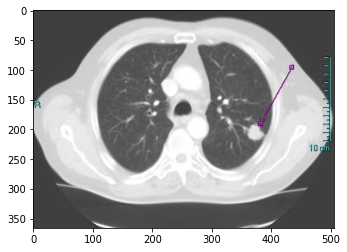

In [27]:
import cv2
im = cv2.imread('C:/Users/PRADEEP/Desktop/cancer.jpg')
plt.imshow(im)
img = cv2.resize(im,(32,32))
img=np.array(img,dtype="float32")/255.0
img = img.reshape((1,3072))
x = predict(img)
if x ==0:
    print('Normal')
elif x ==1:
    print('Lung cancer')

Normal


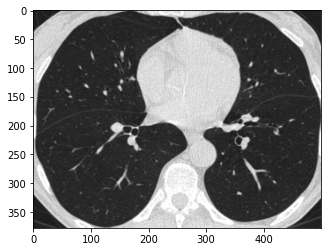

In [28]:
import cv2
im = cv2.imread('C:/Users/PRADEEP/Desktop/normal.jpeg')
plt.imshow(im)
img = cv2.resize(im,(32,32))
img=np.array(img,dtype="float32")/255.0
img = img.reshape((1,3072))
x = predict(img)
if x ==0:
    print('Normal')
elif x ==1:
    print('Lung cancer')